In [2]:
import os
import numpy as np
import math
import time
from server_pull import pull
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
# os.getcwd()

In [3]:
# output = pull('user40','XEq6wByD',2)
# output

# Arm distribution

In [11]:
# Define your function, pull(n), which generates an output integer
# def pull2(n):
#     # Replace this with your actual function logic
#     # For demonstration purposes, returning a random value
#     import random
#     return random.randint(1, 100)

# Create an empty DataFrame to store the output
df = pd.DataFrame()

# Loop through values of n from 0 to 24
for n in range(24):
    # Call the pull function 100 times for each n and store the output in a list
    outputs = [pull('user40','XEq6wByD', n) for _ in range(100)]
    # outputs = [pull2(n) for _ in range(100)]
    
    # Create a new column in the DataFrame with the outputs for the current n
    df[f'arm_{n}'] = outputs

# Display the DataFrame
df.to_csv('arm_distribution.csv')
print(df)


                                                arm_0  \
0   {'Arm': '0', 'NetReward': 232462, 'Pull': 1070...   
1   {'Arm': '0', 'NetReward': 232473, 'Pull': 1070...   
2   {'Arm': '0', 'NetReward': 232476, 'Pull': 1070...   
3   {'Arm': '0', 'NetReward': 232482, 'Pull': 1070...   
4   {'Arm': '0', 'NetReward': 232490, 'Pull': 1070...   
..                                                ...   
95  {'Arm': '0', 'NetReward': 233142, 'Pull': 1079...   
96  {'Arm': '0', 'NetReward': 233150, 'Pull': 1079...   
97  {'Arm': '0', 'NetReward': 233155, 'Pull': 1080...   
98  {'Arm': '0', 'NetReward': 233163, 'Pull': 1080...   
99  {'Arm': '0', 'NetReward': 233167, 'Pull': 1080...   

                                                arm_1  \
0   {'Arm': '1', 'NetReward': 233184, 'Pull': 1080...   
1   {'Arm': '1', 'NetReward': 233197, 'Pull': 1080...   
2   {'Arm': '1', 'NetReward': 233213, 'Pull': 1080...   
3   {'Arm': '1', 'NetReward': 233232, 'Pull': 1080...   
4   {'Arm': '1', 'NetReward': 

In [16]:
df_reward = pd.DataFrame()
for col in df.columns:
    # Extract 'Reward' values from each column and append them to the new DataFrame
    df_reward[col] = df[col].apply(lambda x: x['Reward'])

# Display the new DataFrame with 'Reward' values
df_reward.to_csv('arm_reward_distribution.csv')
print(df_reward)

    arm_0  arm_1  arm_2  arm_3  arm_4  arm_5  arm_6  arm_7  arm_8  arm_9  ...  \
0       5     17     29     15     25     17     24     15     13     18  ...   
1      11     13     22     18     19     28     20     18     14     15  ...   
2       3     16     21     24     20     27      9     21     10     19  ...   
3       6     19     19     12     13     21     19     19     10     18  ...   
4       8     20     17     15     16     26     19     14     12     22  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95      5     22     13     15     17     20      9     12     13     19  ...   
96      8     11     31     23     15     20     16     16     11     18  ...   
97      5     19     24     24     27     20     16     20      4     18  ...   
98      8     19     19     11     18     26     20     17      9     18  ...   
99      4     17     26     14     22     23     17     17      9     15  ...   

    arm_14  arm_15  arm_16 

# Read df_reward from saved csv

In [8]:
df_reward = pd.read_csv("arm_reward_distribution.csv", index_col = 0)
df_reward

,arm_0,arm_1,arm_2,arm_3,arm_4,arm_5,arm_6,arm_7,arm_8,arm_9,...,arm_14,arm_15,arm_16,arm_17,arm_18,arm_19,arm_20,arm_21,arm_22,arm_23
0,5,17,29,15,25,17,24,15,13,18,...,11,25,12,13,13,7,22,21,7,11
1,11,13,22,18,19,28,20,18,14,15,...,8,27,11,12,11,6,20,33,14,14
2,3,16,21,24,20,27,9,21,10,19,...,9,26,20,16,16,10,20,18,7,14
3,6,19,19,12,13,21,19,19,10,18,...,10,25,12,9,11,5,21,30,4,19
4,8,20,17,15,16,26,19,14,12,22,...,7,23,12,16,12,9,16,18,7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,22,13,15,17,20,9,12,13,19,...,12,27,11,11,11,8,21,25,8,10
96,8,11,31,23,15,20,16,16,11,18,...,10,21,19,13,12,6,15,26,7,12
97,5,19,24,24,27,20,16,20,4,18,...,12,23,17,17,8,11,21,22,7,7
98,8,19,19,11,18,26,20,17,9,18,...,10,25,11,15,15,10,19,22,8,16


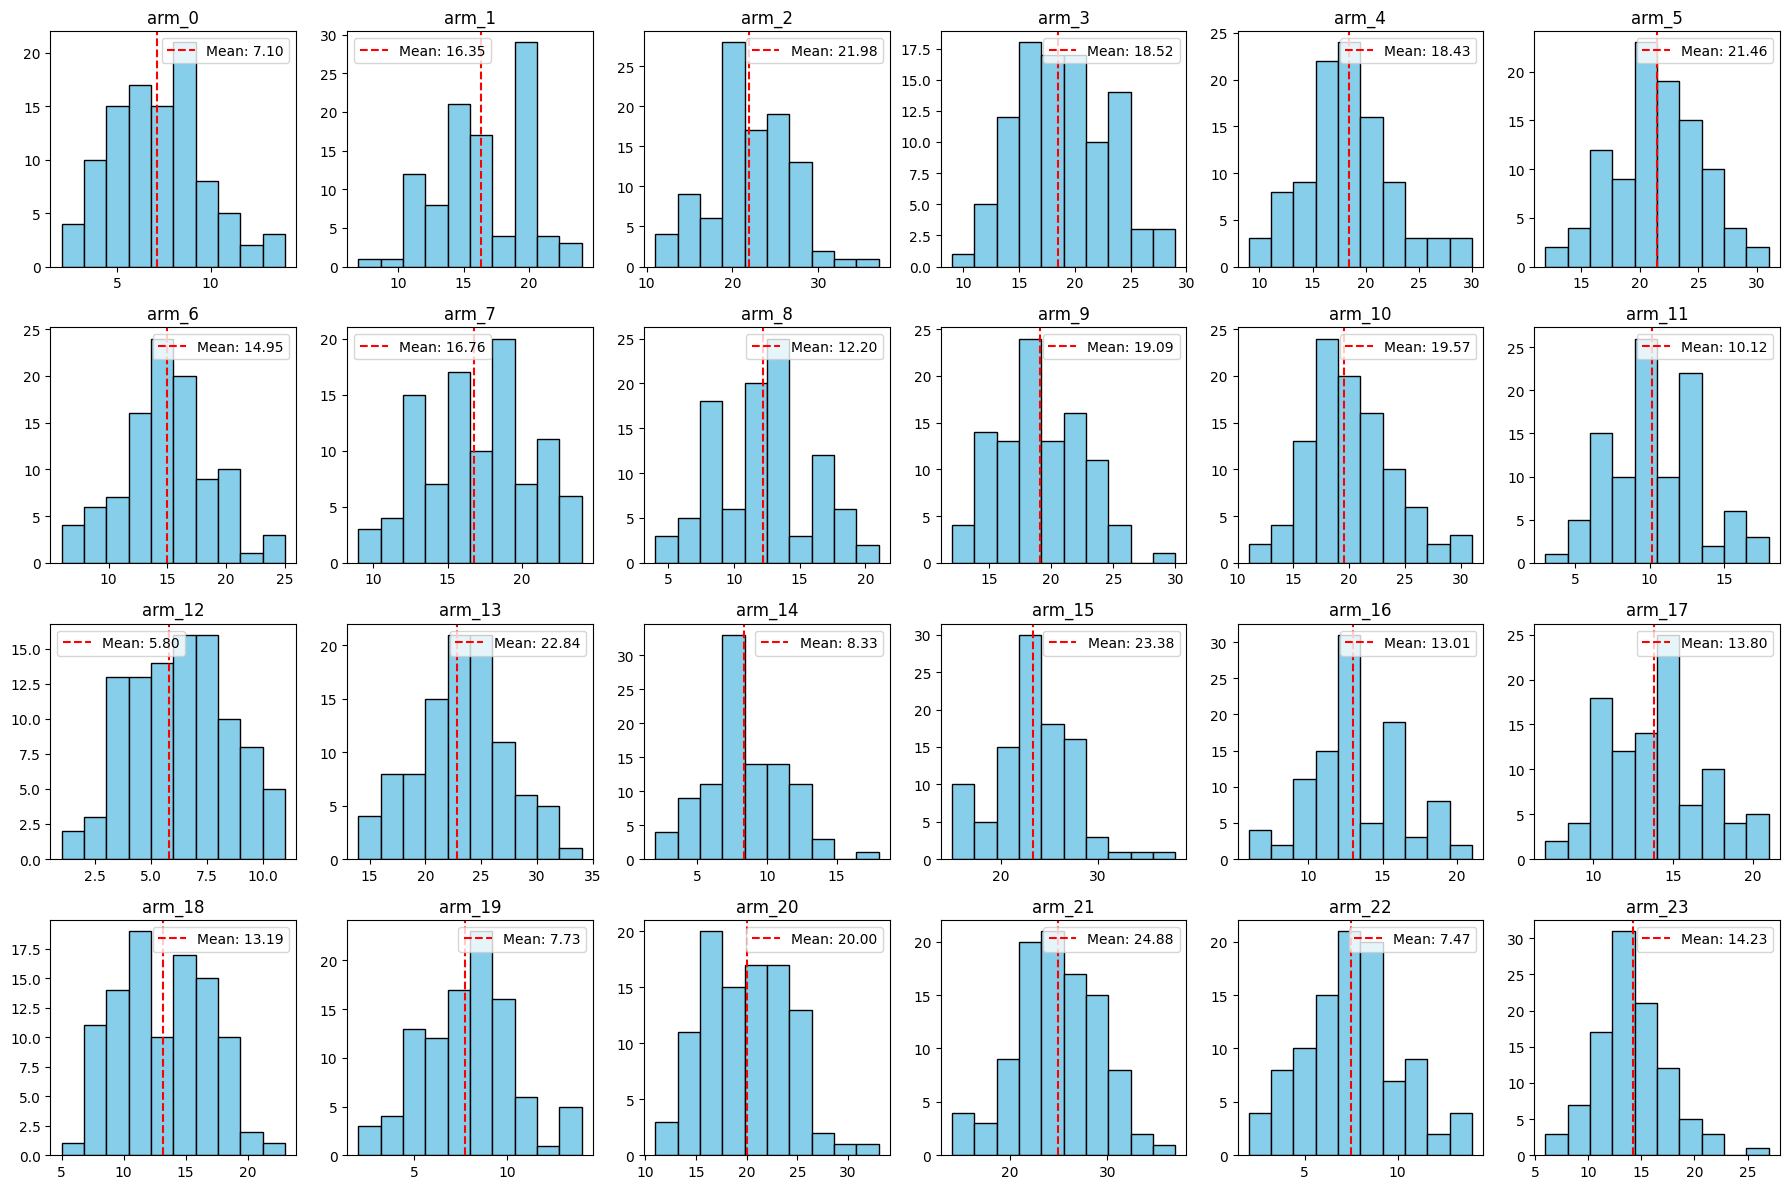

In [15]:
# Create a 4x6 subplot grid
fig, axes = plt.subplots(4, 6, figsize=(18, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for i, column in enumerate(df_reward.columns):
    # Plot a histogram for the current column in the corresponding subplot
    axes[i].hist(df_reward[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(column)  # Set the title of each subplot

    # Calculate the mean of the current column
    mean_value = df_reward[column].mean()
    
    # Plot a red dotted line for the mean value
    axes[i].axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[i].legend()  # Show the legend
    
# Adjust layout and show the plot
plt.tight_layout()
# plt.title('Histogram for each arm')
plt.show()


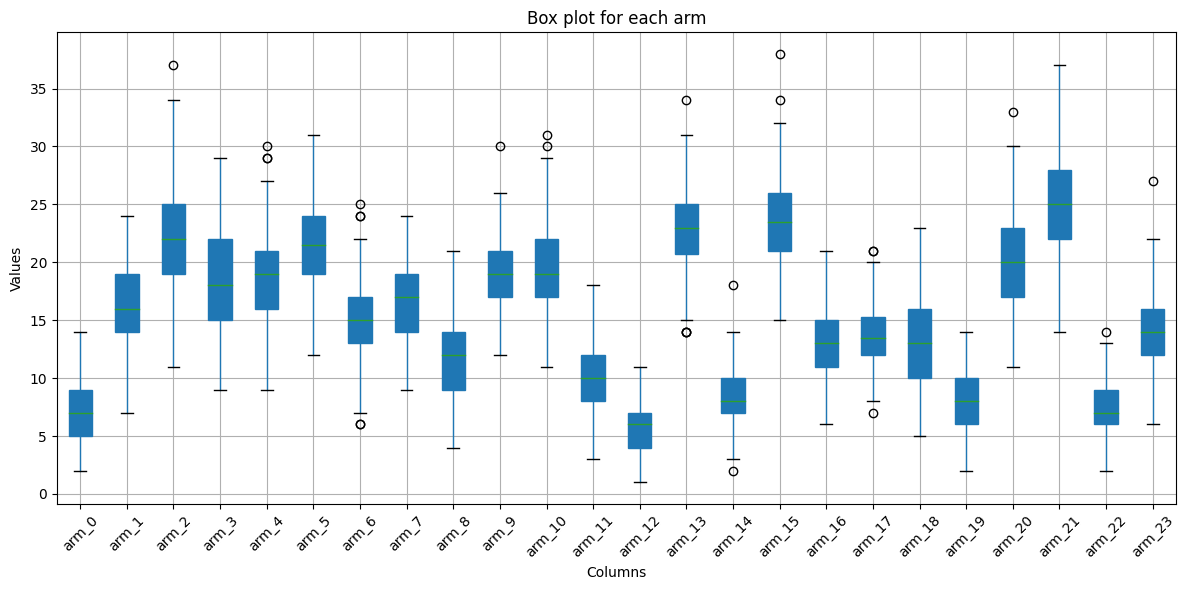

In [13]:
# Plotting box plots for each column
plt.figure(figsize=(12, 6))
df_reward.boxplot(patch_artist=True)
plt.title('Box plot for each arm')
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


In [19]:
mean_values = df_reward.mean()

# Convert the mean values to a DataFrame for sorting and printing
mean_df = pd.DataFrame({'Column Name': mean_values.index, 'Mean Value': mean_values.values})

# Sort the DataFrame by 'Mean Value' in descending order
mean_df = mean_df.sort_values(by='Mean Value', ascending=False)

# Display the sorted mean values along with the column names
print(mean_df)

   Column Name  Mean Value
21      arm_21       24.88
15      arm_15       23.38
13      arm_13       22.84
2        arm_2       21.98
5        arm_5       21.46
20      arm_20       20.00
10      arm_10       19.57
9        arm_9       19.09
3        arm_3       18.52
4        arm_4       18.43
7        arm_7       16.76
1        arm_1       16.35
6        arm_6       14.95
23      arm_23       14.23
17      arm_17       13.80
18      arm_18       13.19
16      arm_16       13.01
8        arm_8       12.20
11      arm_11       10.12
14      arm_14        8.33
19      arm_19        7.73
22      arm_22        7.47
0        arm_0        7.10
12      arm_12        5.80


In [20]:
# Perform Shapiro-Wilk test for normality on each column
for column in df_reward.columns:
    # Perform the Shapiro-Wilk test on the current column
    stat, p_value = shapiro(df_reward[column])
    
    # Print the test statistic and p-value for each column
    print(f"Column: {column}, Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")


Column: arm_0, Test Statistic: 0.9654, P-value: 0.0099
Column: arm_1, Test Statistic: 0.9734, P-value: 0.0402
Column: arm_2, Test Statistic: 0.9841, P-value: 0.2711
Column: arm_3, Test Statistic: 0.9830, P-value: 0.2278
Column: arm_4, Test Statistic: 0.9746, P-value: 0.0498
Column: arm_5, Test Statistic: 0.9889, P-value: 0.5778
Column: arm_6, Test Statistic: 0.9835, P-value: 0.2448
Column: arm_7, Test Statistic: 0.9794, P-value: 0.1194
Column: arm_8, Test Statistic: 0.9871, P-value: 0.4456
Column: arm_9, Test Statistic: 0.9821, P-value: 0.1915
Column: arm_10, Test Statistic: 0.9737, P-value: 0.0429
Column: arm_11, Test Statistic: 0.9754, P-value: 0.0585
Column: arm_12, Test Statistic: 0.9732, P-value: 0.0391
Column: arm_13, Test Statistic: 0.9880, P-value: 0.5087
Column: arm_14, Test Statistic: 0.9739, P-value: 0.0441
Column: arm_15, Test Statistic: 0.9735, P-value: 0.0411
Column: arm_16, Test Statistic: 0.9791, P-value: 0.1135
Column: arm_17, Test Statistic: 0.9760, P-value: 0.0642
Co

In [21]:
# mean and standard deviations
means = []
sds = []
for column in df_reward.columns:
    average = df_reward[column].mean()
    sd_value = df_reward[column].std()
    means.append(average)
    sds.append(sd_value)

stats = pd.DataFrame(np.column_stack([means,sds]), columns = ['mean','standard deviation'])
stats

,mean,standard deviation
0,7.10,2.488357
1,16.35,3.331439
2,21.98,4.796842
3,18.52,4.100948
4,18.43,4.015764
5,21.46,3.888392
6,14.95,3.916747
7,16.76,3.587633
8,12.20,3.521937
9,19.09,3.384740


In [26]:
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame with 24 columns

# Initialize lists to store results
significant_results = []
non_significant_results = []

# Perform Shapiro-Wilk test for normality on each column
for column in df_reward.columns:
    # Perform the Shapiro-Wilk test on the current column
    stat, p_value = shapiro(df_reward[column])
    # print(f"Column: {column}, Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    # print(stat,p_value)
    # Check if the p-value is less than 0.05
    if p_value < 0.05:
        # Store significant results together
        significant_results.append(f"Column: {column}, Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    else:
        # Store non-significant results together
        non_significant_results.append(f"Column: {column}, Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Print significant results
print(f'There are {len(significant_results)} arms that are not normally distributed') 
print("\n".join(significant_results))
print()  # Empty line between significant and non-significant results

# Print non-significant results
print(f'There are {len(non_significant_results)} arms that are normally distributed') 
print("\n".join(non_significant_results))


There are 11 arms that are not normally distributed
Column: arm_0, Test Statistic: 0.9654, P-value: 0.0099
Column: arm_1, Test Statistic: 0.9734, P-value: 0.0402
Column: arm_4, Test Statistic: 0.9746, P-value: 0.0498
Column: arm_10, Test Statistic: 0.9737, P-value: 0.0429
Column: arm_12, Test Statistic: 0.9732, P-value: 0.0391
Column: arm_14, Test Statistic: 0.9739, P-value: 0.0441
Column: arm_15, Test Statistic: 0.9735, P-value: 0.0411
Column: arm_19, Test Statistic: 0.9741, P-value: 0.0460
Column: arm_20, Test Statistic: 0.9731, P-value: 0.0383
Column: arm_22, Test Statistic: 0.9736, P-value: 0.0421
Column: arm_23, Test Statistic: 0.9635, P-value: 0.0072

There are 13 arms that are normally distributed
Column: arm_2, Test Statistic: 0.9841, P-value: 0.2711
Column: arm_3, Test Statistic: 0.9830, P-value: 0.2278
Column: arm_5, Test Statistic: 0.9889, P-value: 0.5778
Column: arm_6, Test Statistic: 0.9835, P-value: 0.2448
Column: arm_7, Test Statistic: 0.9794, P-value: 0.1194
Column: arm